# Tarea 2

# Índice

- [Ejercicio 1](#Ejercicio-1)
- [Ejercicio 2](#Ejercicio-2)
    - [Newton](#Newton)
- [Ejercicio 3](#Ejercicio-3)
    - [a)](#Inciso-a)

In [1]:
using Plots, Test

> Fecha de envío:
>
> Fecha de aceptación:
>

## Ejercicio 1

(a) Consideren el mapeo $F(x) = x^2-2$ definido en $-2 \leq x \leq 2$. A partir de una condición inicial tomada al azar, construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados, o más. Obtengan el histograma de frecuencias (normalizado) de los puntos que la órbita visita.

In [2]:
function trayectoria(f::Function, b::Number, x₀::Number)
    x_array, y_array = iteramapeo(f, x₀)
    dibujartrayectoria(f, b, x₀, x_array, y_array)
end

function trayectoria(f::Function, b::Number, x₀::Number, n_iteraciones::Int)
    x_array, y_array = iteramapeo(f, x₀, n_iteraciones)
    dibujartrayectoria(f, b, x₀, x_array, y_array)
end
    
function histograma(f::Function, b::Number, x₀::Number, n_iteraciones::Int)
    x_array, y_array = iteramapeo(f, x₀, n_iteraciones)
    dibujarhistograma(y_array[3:end], b)
end

function histograma(f::Function, b::Number, x₀::Array, n_iteraciones::Int)
    _, big_array = iteramapeo(f, x₀[1], n_iteraciones)
    big_array = big_array[3:end]
    for x_0 in x₀[2:end]
        _, y_array = iteramapeo(f, x_0, n_iteraciones)
        append!(big_array, y_array[3:end])
    end
    dibujarhistograma(big_array, b)
end

function iteramapeo(f::Function, x₀::Number)
    ϵ = 0.001
    r = Inf
    xₙ = x₀

    x_array = [x₀]
    y_array = [0.]
    while r > ϵ
        xₙ₊₁ = f(xₙ)
        r = abs(xₙ₊₁ - xₙ)
        push!(x_array,xₙ,xₙ₊₁)
        push!(y_array,xₙ₊₁,xₙ₊₁)
        xₙ = xₙ₊₁
    end
    return x_array, y_array
end

function iteramapeo(f::Function, x₀::Number, n_iteraciones::Int)
    ϵ = 0.001
    r = Inf
    xₙ = x₀

    x_array = [x₀]
    y_array = [0.]
    for _ in 1:n_iteraciones
        xₙ₊₁ = f(xₙ)
        push!(x_array,xₙ,xₙ₊₁)
        push!(y_array,xₙ₊₁,xₙ₊₁)
        xₙ = xₙ₊₁
    end
    return x_array, y_array
end

function dibujartrayectoria(f::Function, b::Number, x₀::Number, x_array::Array, y_array::Array)
    x = -b:0.01:b
    plot(x, f.(x), label = "f₁(x) = √x", size=(950,500), lw = 2)
    plot!(x, x, label = "f₂(x) = x", lw = 3)
    xlabel!("xₙ")
    ylabel!("xₙ₊₁")
    plot!(x_array, y_array, lw = 1, label = "Trayectoria", ls=:dash)
    scatter!([x₀], [f(x₀)], label = "Condición inicial")
end

function dibujarhistograma(y_array::Array, b::Number)
    y_visitas = (y_array[1:2:end] .+ b) ./ (2b)
    #y_visitas = y_array[1:2:end]
    histogram(y_visitas, bins=100, title="Histograma de frecuencias para f(x)=x² - $b", label=false)
end

dibujarhistograma (generic function with 1 method)

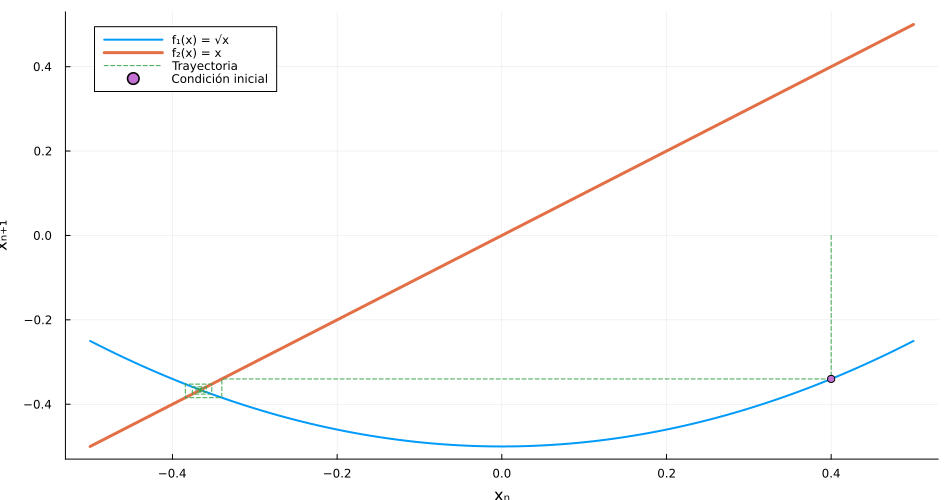

In [3]:
b = 0.5
f(x) = x^2 - b
x₀ = 0.4
n_iteraciones = 300
trayectoria_1 = trayectoria(f, b, x₀, n_iteraciones)

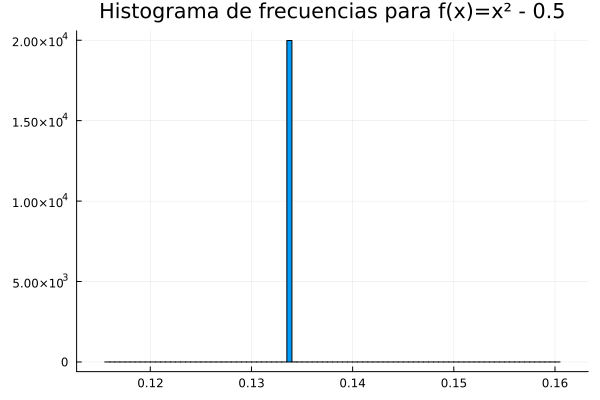

In [4]:
n_iteraciones = 20000
histograma(f, b, x₀, n_iteraciones)

(b) Repitan el ejercicio anterior pero considerando muchas condiciones iniciales, pero pocos iterados (~50).

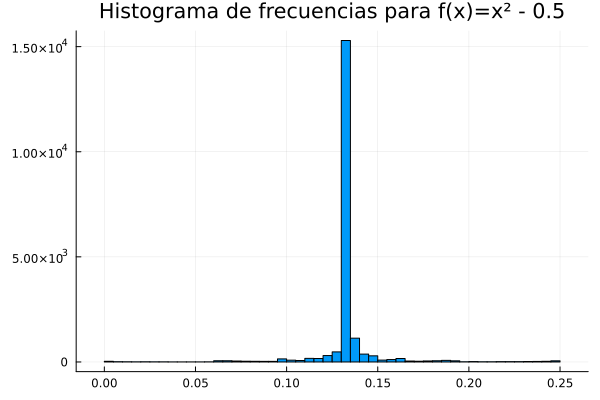

In [5]:
n_condiciones_iniciales = 400
n_iteraciones = 50
x₀ = 2b .* (rand(n_condiciones_iniciales)) .- b
histograma(f, b, x₀, n_iteraciones)

(c) ¿Qué conclusión podemos sacar de los histogramas en ambos casos?

<div class="alert alert-warning">
Pareciera que si tenemos muchas iteraciones convergemos más rápido. Si tenemos muchas condiciones iniciales y pocas iteraciones, tenemos una densidad más grande en cuanto a puntos que no son fijos.

Es interesante el observar cómo se comporta el fenómeno al cambiar la constante $b$. En ciertos casos se recorre todo el intervalo que indiquemos como dominio con una condición inicial, mientras que en otras sólo se recorre un intervalo muy corto.
</div>

---

## Ejercicio 2

(a) Usando lo que hicieron en la Tarea 1, incluyan lo que desarrollaron para los números `Dual`es en un módulo que llamaremos `NumDual` de Julia ([ver la documentación aquí](https://docs.julialang.org/en/v1/manual/modules/)). En particular, el módulo debe exportar el tipo `Dual` y la función `var_dual`, al menos. El archivo con el módulo lo deben incluir en un archivo ".jl" en su propio directorio de tareas. Carguen el módulo en este notebook, usando
```
include("nombre_archivo.jl")
using NumDual
```

In [6]:
include("duales.jl")
using .NumDual

(b) Escriban una función que implemente el método de Newton para funciones en una dimensión. La derivada que se requiere debe ser calculada a través de los números duales. Obtengan usando esta implementación un cero de $f(x) = x^3 - 8$, para verificar que su implementación funciona.

<div class="alert alert-warning">
El método de Newton viene dado por la ecuación:
$$
x_{n+1} = x_{n} + \frac{f(x_{n})}{f\prime (x_{n})},
$$
por lo que habría que plantearlo con números Duales:
</div>

# Newton

In [7]:
function metodonewton(func, x₀, n_iteraciones)
    xₙ = x₀
    xₙ₊₁ = 0.
    for _ in 1:n_iteraciones
        xd = NumDual.vardual(xₙ)
        f_dual = func(xd)
        #@show xₙ, xd, f_dual
        g, g′ = f_dual.fun, f_dual.der
        xₙ₊₁ = xₙ - g / g′
        #@show xₙ, xₙ₊₁, g, g′, g / g′, xd
        #@show xₙ, g, g′, xₙ₊₁
        xₙ = xₙ₊₁
    end
    
    return xₙ₊₁
end

metodonewton (generic function with 1 method)

In [8]:
f(x) = x^3 - 8.
x₀ = 2.3
n_iteraciones = 30
raiz = metodonewton(f, x₀, n_iteraciones)

2.0

In [9]:
@test f(raiz) == 0.

Test Passed

[Índice](#Índice)

(c) Encuentren *todos* los puntos fijos del mapeo $F(x) = x^2 - 1.1$ usando la función que implementaron para el método de Newton.

In [10]:
F(x) = x^2 - 1.1
G(x) = F(x) - x
x₀₁ = 10.
n_iteraciones = 30
raiz_1 = metodonewton(G, x₀₁, n_iteraciones)

1.661895003862225

In [11]:
x₀₂ = -0.1
raiz_2 = metodonewton(G, x₀₂, n_iteraciones)

-0.6618950038622251

(d) Encuentren los puntos *de periodo 2* para el mapeo $F(x) = x^2 - 1.1$ usando la función que implementaron para el método de Newton.

In [12]:
function findroots(G::Function, n_iteraciones::Int, n_condiciones_iniciales::Int = 100)
    roots = []
    for x_0 in 10*rand(n_condiciones_iniciales) .- 5
        #@show x_0
        raiz = metodonewton(G, x_0, n_iteraciones)
        if isempty(roots)
            push!(roots, raiz)
        else
            counter = 0
            for root in roots
                if root ≈ raiz
                    continue
                else
                    counter += 1
                end
            end
            if counter == length(roots)
                push!(roots, raiz)
            end
        end
    end
    return roots
end

findroots (generic function with 2 methods)

In [13]:
n_iteraciones = 30
G₂(x) = ∘([F for _ in 1:2]...)(x) - x
puntos_periodo_2 = findroots(G₂, n_iteraciones)

4-element Vector{Any}:
 -1.0916079783099617
 -0.6618950038622251
  1.661895003862225
  0.0916079783099617

(e) Usen los números duales para mostrar que los puntos de periodo 2 para el mapeo $F(x) = x^2 -1$ son linealmente estables (atractivos).

In [14]:
function puntosperiodon(f, n, n_iteraciones = 30)
    roots = []
    puntos_anteriores_periodos = []
    for i = 1:n
        Qn = c -> ∘([f for _ in 1:i]...)(c) - c
        roots = findroots(Qn, n_iteraciones)
        @show i, roots
        if i != n
            append!(puntos_anteriores_periodos, roots)
        end
    end
    @show puntos_anteriores_periodos
    puntos_periodo_n = []
    for root in roots
        if length(puntos_anteriores_periodos) > 0
            if sum(isapprox.(root, puntos_anteriores_periodos)) == 0
                push!(puntos_periodo_n, root)
            end
        else
            puntos_periodo_n = roots
        end
    end
    return puntos_periodo_n
end

puntosperiodon (generic function with 2 methods)

In [15]:
n_iteraciones = 300
F₁(x) = x^2 - 1.
puntos_periodo_2 = puntosperiodon(F₁, 2)

(i, roots) = (1, Any[1.618033988749895, -0.6180339887498949])
(i, roots) = (2, Any[1.618033988749895, -1.0, 0.0, -0.6180339887498949])
puntos_anteriores_periodos = Any[1.618033988749895, -0.6180339887498949]


2-element Vector{Any}:
 -1.0
  0.0

In [16]:
for xₙ in puntos_periodo_2
    xd = NumDual.vardual(xₙ)
    f_dual = F₁(F₁(xd))
    @show xₙ, f_dual.der
end

(xₙ, f_dual.der) = (-1.0, -0.0)
(xₙ, f_dual.der) = (0.0, -0.0)


Al evaluar los puntos de periodo 2 en la derivada de la función, vemos que todo es, en valor absoluto, menor que 1

---

[Índice](#Índice)

## Ejercicio 3

Llamaremos $c_n$ al valor del parámetro $c$ para el mapeo cuadrático
$Q_c(x) = x^2-c$, donde ocurre el ciclo superestable de periodo $2^n$,
esto es, el valor de $c$ tal que $x_0=0$ pertenece a la órbita
periódica de periodo $2^n$.
Algunos de estos valores fueron obtenidos numéricamente en clase; esto puede
servir como test inicial.

- Calculen los valores de $c_r$, al menos hasta $c_6$; traten
de obtener aún más. Con estos valores, definimos la secuencia:
$\{f_0, f_1, f_2, \dots\}$, donde
\begin{equation*}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation*}
Aproximen el valor al que converge esta secuencia,
es decir, dar una estimación de $\delta = f_\infty$.

<div class="alert alert-warning">
Parece que debe ser un procedimiento muy parecido a como lo hicimos en el ejercicio 2 para los periodos, pero habría que resolver más bien para c en lugar que para x en la ecuación
    $$
    g^{n}(x_0) = f^{n}(x_0) - x_0 = 0
    $$
    
Intentemos hacer una función:
</div>

In [18]:
Q(x, c) = x^2 - c

Q (generic function with 1 method)

In [19]:
function Qn(x,c,n_composiciones)
    x₀ = x
    for i = 1:n_composiciones
        x₁ = Q(x₀, c)
        x₀ = x₁
    end
    return x₀
end

Qn (generic function with 1 method)

## Inciso a

In [34]:
function findfirstroot(f::Function, anteriores_raices::Array; n_iteraciones::Int=30)
    last_root = anteriores_raices[end]
    if length(anteriores_raices) == 1
        step = anteriores_raices[1] + 1
    else
        step = last_root + (last_root - anteriores_raices[end-1])/4
    end
    x_0 = step
    #@show step
    root = last_root
    while sum(root .≈ anteriores_raices) > 0
        root = metodonewton(f, x_0, n_iteraciones)
        #@show x_0, root
        x_0 += step
    end
    return root
end

findfirstroot (generic function with 1 method)

In [76]:
function findcn(n::Int, anteriores_raices::Array; n_iteraciones::Int=300)
    if length(anteriores_raices) < 1
        #println("Nos encontramos en el caso donde n = 0")
        return findroots(c -> Qn(0.0, c, 2^n), n_iteraciones)
    else
        return findfirstroot(c -> Qn(0.0, c, 2^n), anteriores_raices, n_iteraciones=n_iteraciones)
    end
end

findcn (generic function with 1 method)

In [79]:
function findallcn(ns::Int; n_iteraciones::Int=300)
    anterior = Array{Float64}(undef,0)
    for n = 0:ns
        cn = findcn(n, anterior; n_iteraciones)
        push!(anterior, cn[1])
    end
    return anterior
end

findallcn (generic function with 1 method)

In [80]:
findallcn(8)

9-element Vector{Float64}:
 0.0
 1.0
 1.3107026413368328
 1.3815474844320617
 1.3969453597045602
 1.4002530812147829
 1.4009619629448407
 1.4011138049397773
 1.4011463258269468

In [81]:
function fₙ(cns::Array)
    n = length(cns) - 1
    fn = Array{Float64}(undef,0)
    for i = 1:(n-1)
        operacion = (cns[i] - cns[i+1]) / (cns[i+1] - cns[i+2])
        #println("($(cns[i]) - $(cns[i+1])) / ($(cns[i+1]) - $(cns[i+2])) = ", operacion)
        push!(fn, operacion)
    end
    fn
end

fₙ (generic function with 1 method)

In [82]:
n = 12
fₙ(findallcn(n))

11-element Vector{Float64}:
 3.218511422038089
 4.38567759856832
 4.60094927653827
 4.6551304953911385
 4.666111947832242
 4.668548581394921
 4.669060660786975
 4.669171556184238
 4.669195145451617
 4.669200224511226
 4.6692017716709735

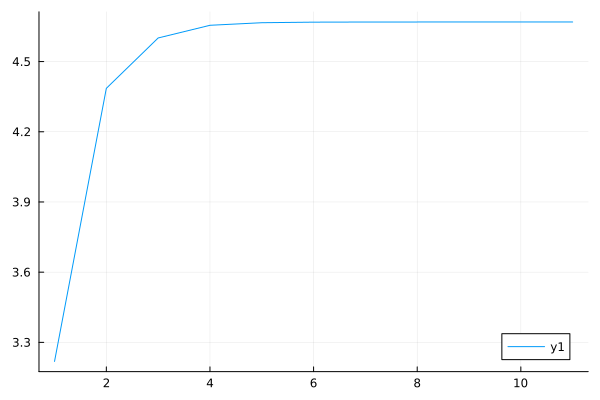

In [85]:
plot(1:n-1, fₙ(findallcn(n)))

---

[Volver a inicio](#Índice)

- De los $2^p$ puntos del ciclo de periodo $2^p$, es decir,
$\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (*distinto del 0*) cuya distancia
a 0 es la menor; a esa distancia la identificaremos como $d_n$.
Estimen numéricamente a qué converge la secuencia
\begin{equation*}
\alpha = - d_n/d_{n+1},
\end{equation*}
en el límite de $n$ muy grande.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*